# EDA Student Performance

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv('data/stud.csv')


In [23]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [26]:
avg_marks=data.groupby('gender')[['reading_score','writing_score','math_score']].mean().reset_index()
avg_marks

,gender,reading_score,writing_score,math_score
0,female,72.608108,72.467181,63.633205
1,male,65.473029,63.311203,68.728216


In [27]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


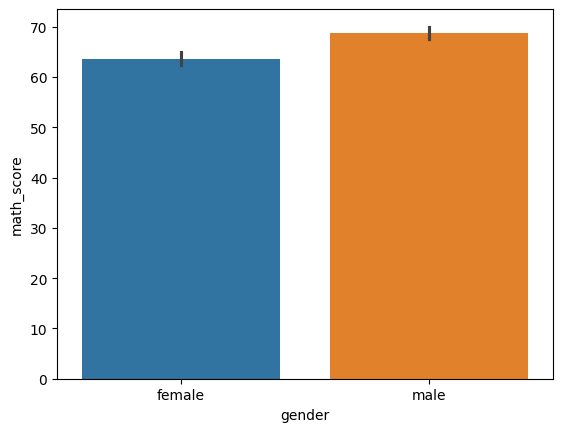

In [28]:
sns.barplot(data=data,x='gender',y='math_score',hue='gender')
plt.show()

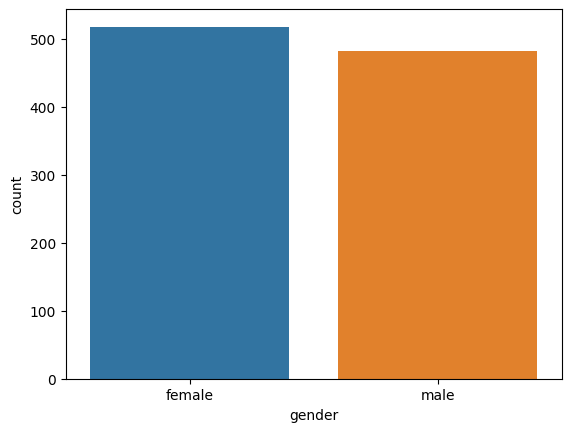

In [29]:
sns.countplot(data=data,x='gender',hue='gender')
plt.show()

<Axes: xlabel='gender', ylabel='math_score'>

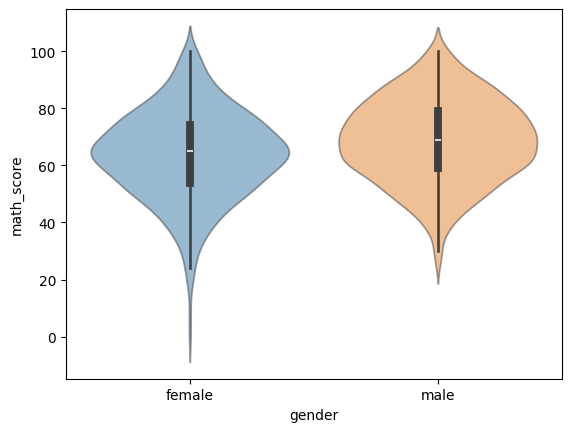

In [30]:
sns.violinplot(data=data,x='gender',y='math_score',hue='gender',alpha=0.5)

In [31]:
race_ethnicity_GRP=data.groupby(by='race_ethnicity')['math_score'].mean()
race_ethnicity_GRP

race_ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math_score, dtype: float64

In [32]:
race_ethnicity_counts=data.race_ethnicity.value_counts(normalize=True)

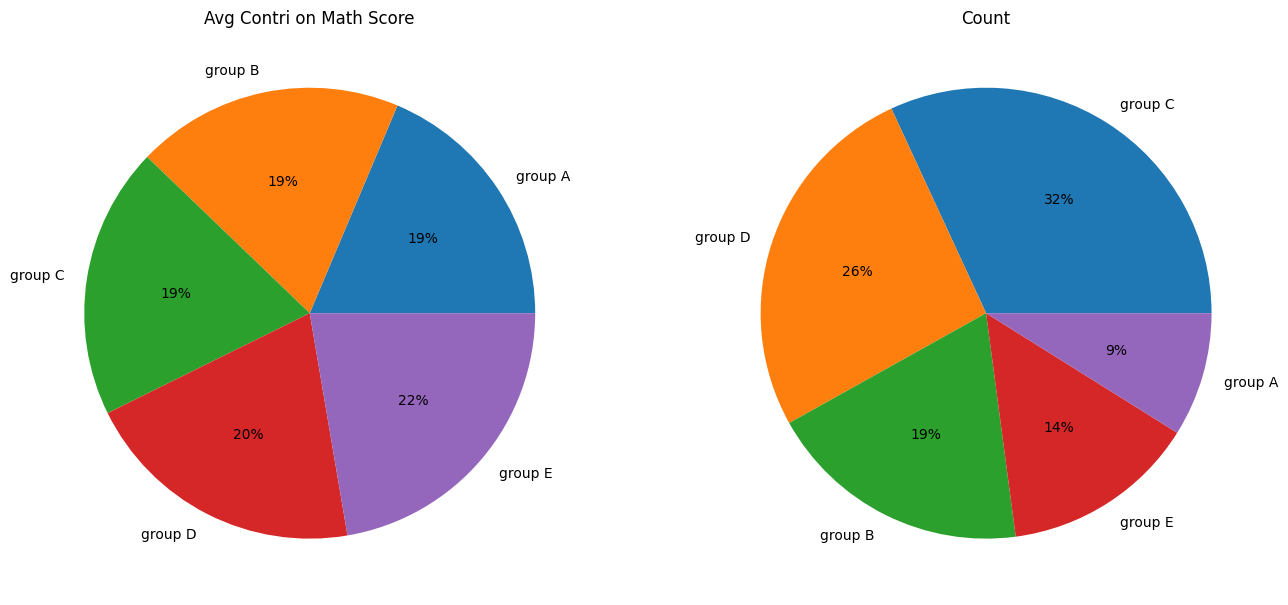

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
ax1.pie(race_ethnicity_GRP,labels=race_ethnicity_GRP.index,autopct='%1.0f%%')
ax1.set_title("Avg Contri on Math Score")
ax2.pie(race_ethnicity_counts,labels=race_ethnicity_counts.index,autopct='%1.0f%%')
ax2.set_title("Count")
plt.show()

In [34]:
num_col=[i for i in data.columns if data[i].dtype!='O']
num_col


['math_score', 'reading_score', 'writing_score']

In [35]:
cat_col=[i for i in data.columns if data[i].dtype=='O']
cat_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [42]:
print(f"There are {len(num_col)} numeric columns: {num_col} \n and {len(cat_col)} Categorical columns {cat_col}")

There are 3 numeric columns: ['math_score', 'reading_score', 'writing_score'] 
 and 5 Categorical columns ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [46]:
data['avg_score']=data[num_col].mean(axis=1).round(3)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.667,218
1,female,group C,some college,standard,completed,69,90,88,82.333,247
2,female,group B,master's degree,standard,none,90,95,93,92.667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333,148
4,male,group C,some college,standard,none,76,78,75,76.333,229


In [47]:
for feature in data.columns:
    if data[feature].dtype=='O':
        print(f"{feature}:-> {data[feature].unique()}")
    elif data[feature].dtype!='O':
        print(f"{feature}")
    else:
        print("no data")

gender:-> ['female' 'male']
race_ethnicity:-> ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education:-> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:-> ['standard' 'free/reduced']
test_preparation_course:-> ['none' 'completed']
math_score
reading_score
writing_score
avg_score
Total Score


In [48]:
data['Total Score']=data[num_col].sum(axis=1)
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.667,218
1,female,group C,some college,standard,completed,69,90,88,82.333,247
2,female,group B,master's degree,standard,none,90,95,93,92.667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333,148
4,male,group C,some college,standard,none,76,78,75,76.333,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000,282
996,male,group C,high school,free/reduced,none,62,55,55,57.333,172
997,female,group C,high school,free/reduced,completed,59,71,65,65.000,195
998,female,group D,some college,standard,completed,68,78,77,74.333,223


In [58]:
for subject in num_col:
   full_marks=data[data[subject]==100]['avg_score'].count()
   print(f"Number of student with full marks in: {subject.replace('_score','').capitalize()}: {full_marks}")


Number of student with full marks in: Math: 7
Number of student with full marks in: Reading: 17
Number of student with full marks in: Writing: 14


In [59]:
for subject in num_col:
    less_marks=data[data[subject]<=20]['avg_score'].count()
    print(f"Number of students with less marks in {subject.replace('_score','').capitalize()}: {less_marks} students")

Number of students with less marks in Math: 4 students
Number of students with less marks in Reading: 1 students
Number of students with less marks in Writing: 3 students


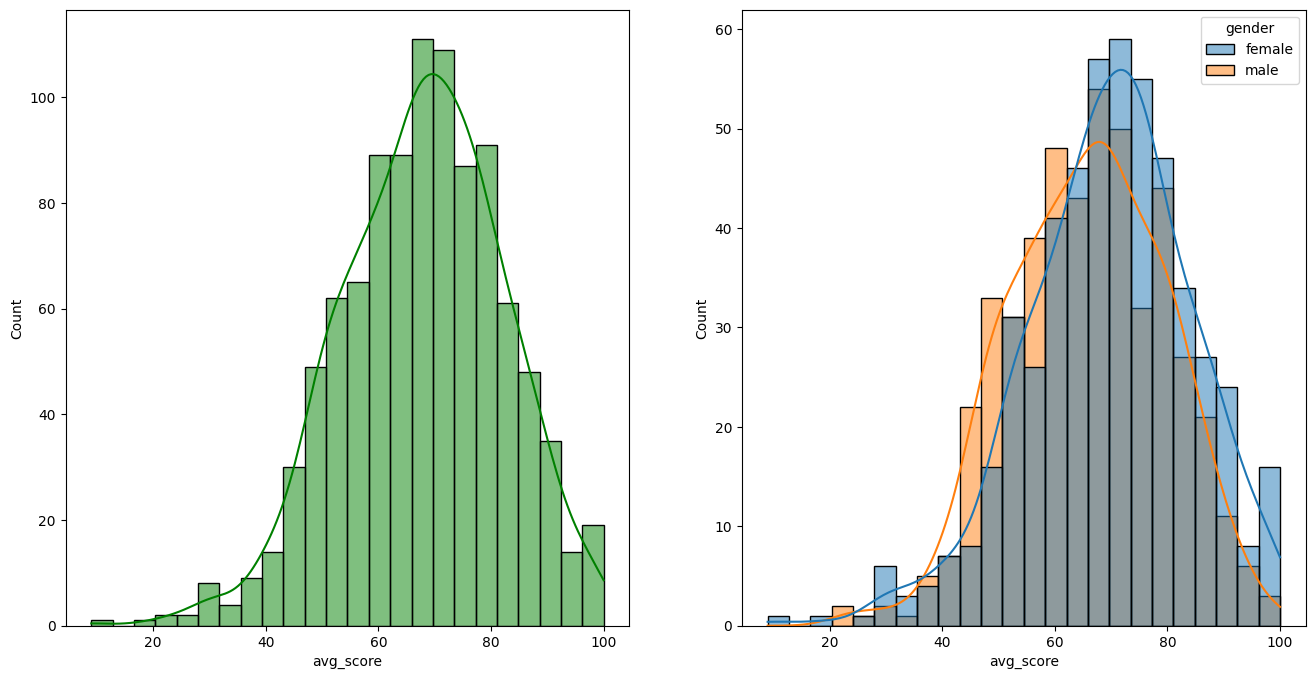

In [75]:
fig,axs=plt.subplots(1,2,figsize=(16,8))
plt.subplot(121)
sns.histplot(data=data,x='avg_score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='avg_score',kde=True,hue='gender')
plt.show()